# Classifying URLs as Phishing/Legitimate

Steps performed:
- Data Pre-Processing
  - General Exploratory Data Analysis
  - Dimensionality Reduction - Principal Component Analysis

For each model, we've done performance evaluation as well.
- Model 1: Logistic Regression
- Model 2: Naive Bayes
- Model 3: Random Forest
- Model 4: Support Vector Machine
- Model 5: Decision Tree
- Model 6: XG Boost


## Importing Necessary Libraries

In [33]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Dimensionality reduction
from sklearn.decomposition import PCA

# Pipeline
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    roc_auc_score
)

## Data Pre-Processing

### General Exploratory Data Analysis

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set working directory
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
main_data = pd.read_csv('phishing_dts.csv')

In [5]:
main_data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
main_data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [7]:
main_data.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


In [8]:
# Check target variable distribution
label_counts = main_data['label'].value_counts()
label_counts

,count
label,
1,134850
0,100945


<ipython-input-9-14264652762e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


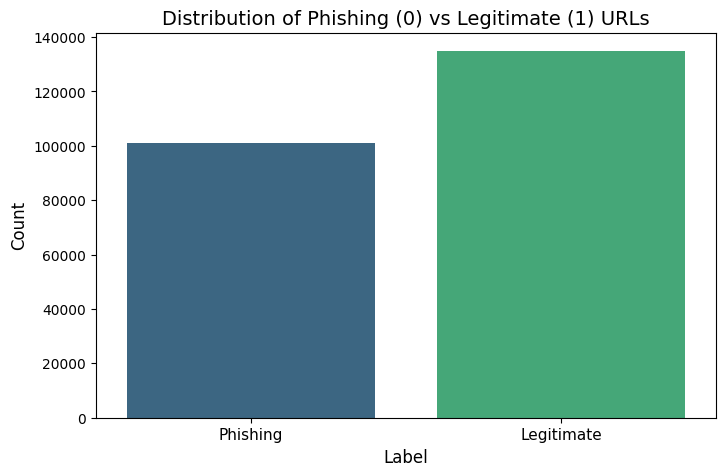

In [9]:
# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Distribution of Phishing (0) vs Legitimate (1) URLs", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Phishing', 'Legitimate'], fontsize=11)
plt.show()

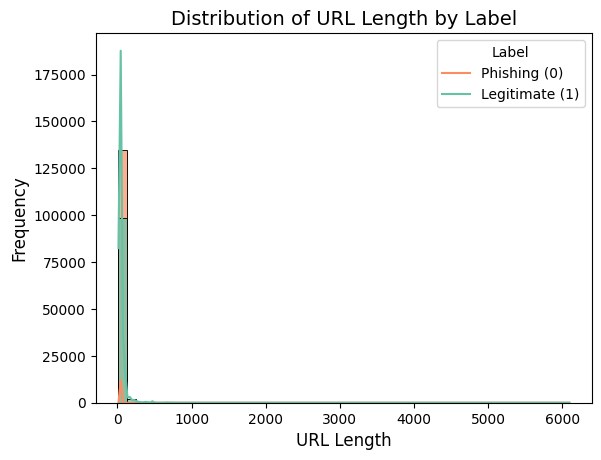

In [10]:
# URL Length distribution
sns.histplot(data=main_data, x='URLLength', hue='label', kde=True, bins=50, palette='Set2', alpha=0.7)
plt.title("Distribution of URL Length by Label", fontsize=14)
plt.xlabel("URL Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label", labels=["Phishing (0)", "Legitimate (1)"])  # Adjust legend labels
plt.show()

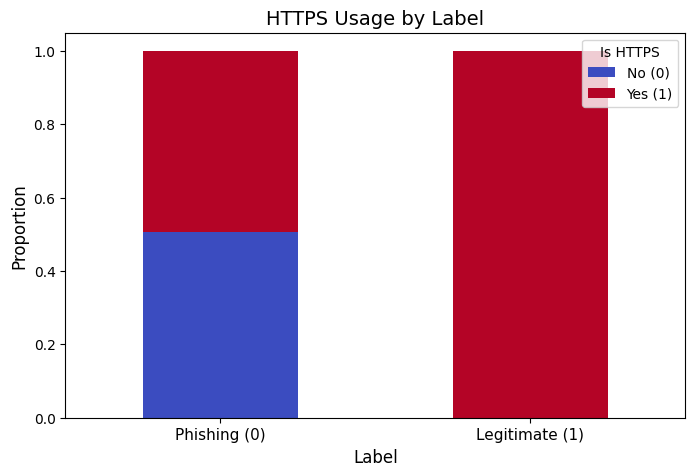

In [11]:
# HTTPS usage by label
https_counts = main_data.groupby('label')['IsHTTPS'].value_counts(normalize=True).unstack()

# Plot HTTPS usage
https_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("HTTPS Usage by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks([0, 1], ['Phishing (0)', 'Legitimate (1)'], rotation=0, fontsize=11)
plt.legend(title="Is HTTPS", labels=["No (0)", "Yes (1)"], loc='upper right')
plt.show()

In [12]:
# Number of Subdomains by label
# Group the data by the number of subdomains and label
subdomain_counts = main_data.groupby(['NoOfSubDomain', 'label']).size().unstack(fill_value=0)

# Rename columns for clarity
subdomain_counts.columns = ['Phishing URLs (label 0)', 'Legitimate URLs (label 1)']

# Reset index to show the number of subdomains as a column
subdomain_counts.reset_index(inplace=True)
subdomain_counts.rename(columns={'NoOfSubDomain': 'Number of Subdomains'}, inplace=True)

# Display the results
print(subdomain_counts)

   Number of Subdomains  Phishing URLs (label 0)  Legitimate URLs (label 1)
0                     0                    13983                          0
1                     1                    63545                     114861
2                     2                    18115                      18238
3                     3                     3428                       1691
4                     4                     1503                         60
5                     5                      336                          0
6                     6                       21                          0
7                     7                        5                          0
8                     8                        4                          0
9                    10                        5                          0


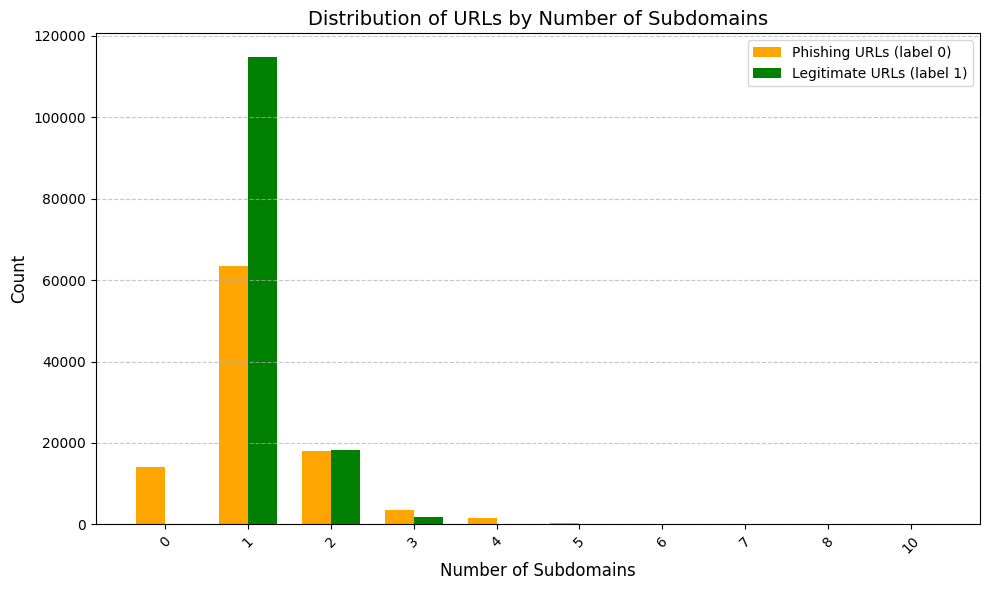

In [13]:
# Data for visualization
subdomain_values = subdomain_counts['Number of Subdomains']
phishing_counts = subdomain_counts['Phishing URLs (label 0)']
legitimate_counts = subdomain_counts['Legitimate URLs (label 1)']

# Bar width and positions
bar_width = 0.35
positions = np.arange(len(subdomain_values))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(positions - bar_width / 2, phishing_counts, width=bar_width, label='Phishing URLs (label 0)', color='orange')
plt.bar(positions + bar_width / 2, legitimate_counts, width=bar_width, label='Legitimate URLs (label 1)', color='green')

# Labels and title
plt.xlabel('Number of Subdomains', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of URLs by Number of Subdomains', fontsize=14)
plt.xticks(positions, subdomain_values, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


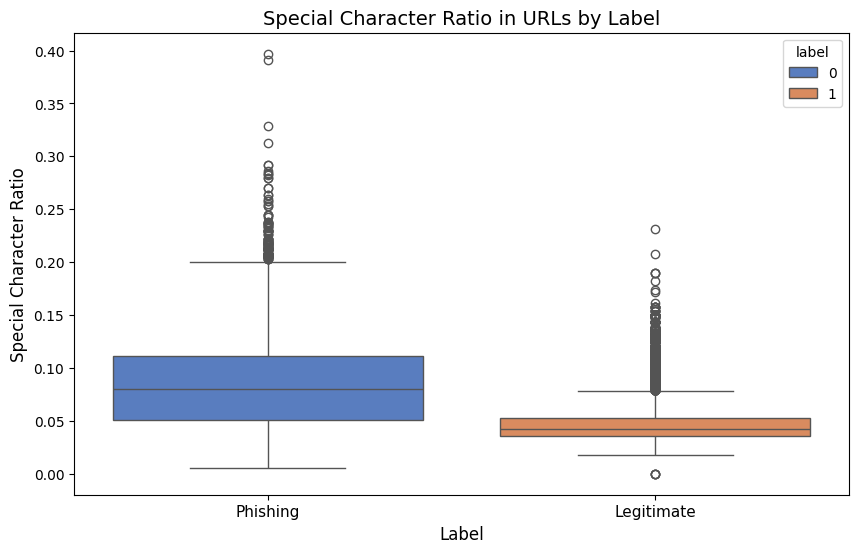

In [14]:
# Special Character Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(data=main_data, x='label', y='SpacialCharRatioInURL', palette='muted', hue='label')
plt.title("Special Character Ratio in URLs by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Special Character Ratio", fontsize=12)
plt.xticks([0, 1], ['Phishing', 'Legitimate'], fontsize=11)
plt.show()

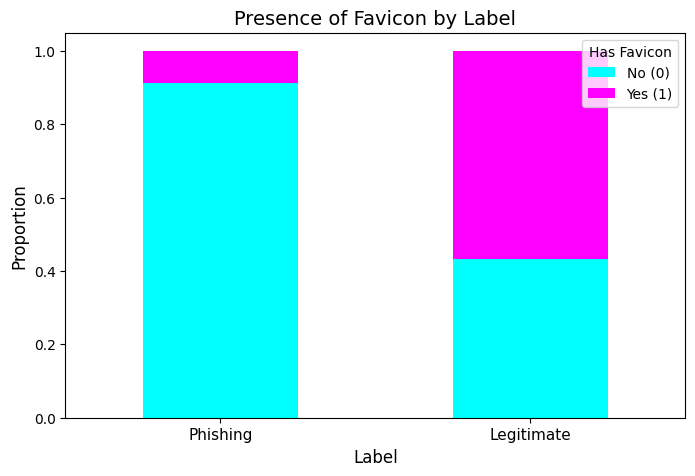

In [15]:
# Favicon analysis
favicon_counts = main_data.groupby('label')['HasFavicon'].value_counts(normalize=True).unstack()
favicon_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='cool')
plt.title("Presence of Favicon by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks([0, 1], ['Phishing', 'Legitimate'], rotation=0, fontsize=11)
plt.legend(title="Has Favicon", labels=["No (0)", "Yes (1)"], loc='upper right')
plt.show()

In [16]:
numerical_cols = main_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = main_data.select_dtypes(include=['object']).columns.tolist()

# Perform correlation on numerical data only
correlation_matrix = main_data[numerical_cols].corr()
correlation_matrix.shape

(51, 51)

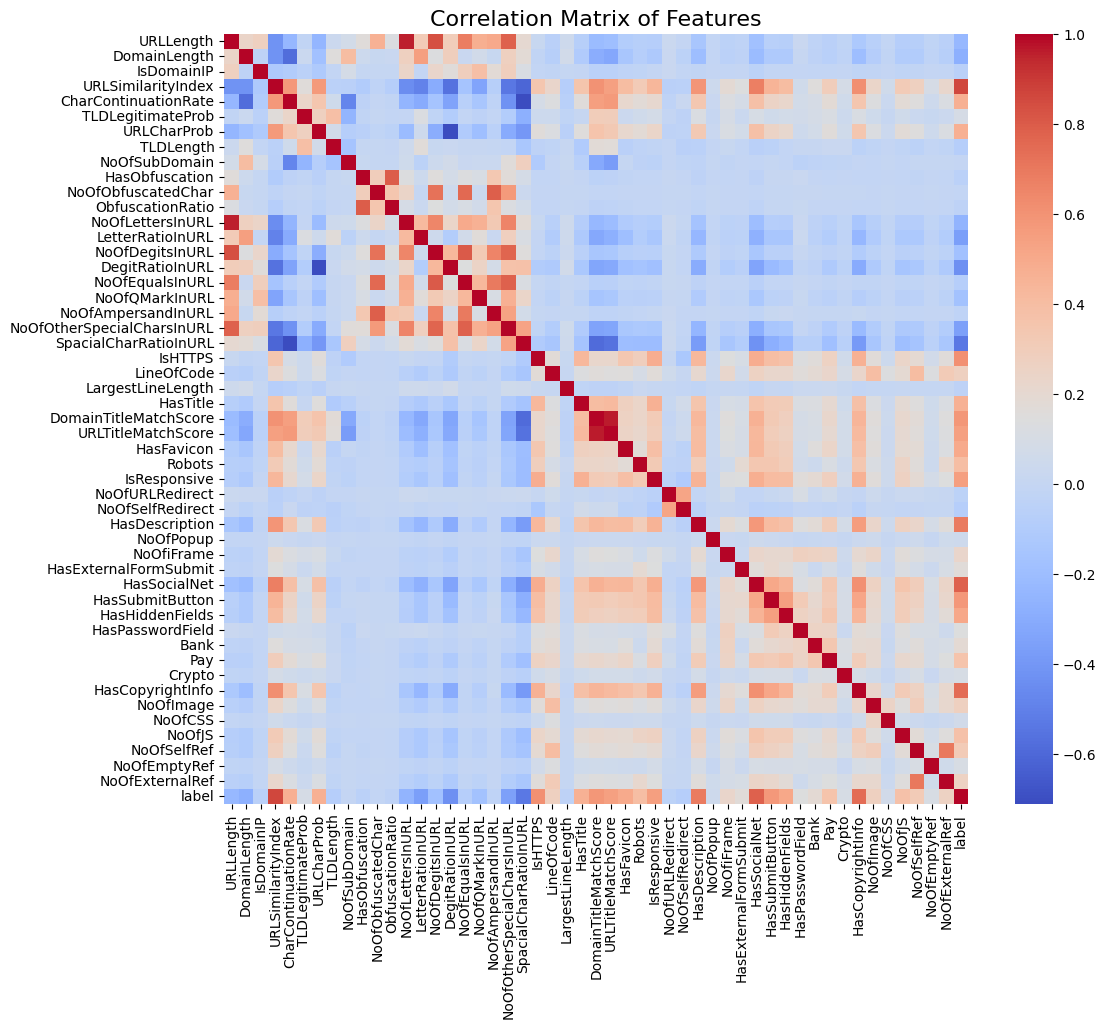

In [17]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()

### Dimensionality Reduction - Principal Component Analysis

In [18]:
if 'label' in numerical_cols:
    numerical_cols.remove('label')

In [19]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
Categorical Columns: ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']


In [20]:
domain_counts = main_data['Domain'].value_counts()
main_data['Domain_freq_encoded'] = main_data['Domain'].map(domain_counts)

# One-Hot Encoding for 'TLD'
# We will use ColumnTransformer to handle this within a pipeline

# Update categorical columns list
categorical_cols = ['TLD']

# Define Preprocessing for Numerical and Categorical Data
# Numerical data: Standard Scaling
# Categorical data: One-Hot Encoding
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [21]:
# Separate features and target variable
X = main_data.drop(['label'], axis=1, errors='ignore')  # Drop target column
y = main_data['label']  # Target variable

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [col for col in numerical_cols if col in X.columns]),
        ('cat', categorical_transformer, [col for col in categorical_cols if col in X.columns])
    ],
    remainder='drop'  # Drop other columns not listed
)

In [23]:
pca = PCA(n_components=10) # Use a fixed number of components

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

In [24]:
X_transformed = pipeline.fit_transform(X)

print("Original Features:", X.shape[1])
print("Reduced Features after PCA:", X_transformed.shape[1])

Original Features: 56
Reduced Features after PCA: 10


In [25]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance by each principal component:\n", explained_variance)
print("Cumulative Explained Variance:\n", cumulative_variance)

Explained Variance by each principal component:
 [0.18106371 0.09850853 0.05423785 0.04193998 0.03691608 0.03583582
 0.03140788 0.02934518 0.02724146 0.02437079]
Cumulative Explained Variance:
 [0.18106371 0.27957224 0.33381008 0.37575007 0.41266615 0.44850197
 0.47990985 0.50925502 0.53649649 0.56086727]


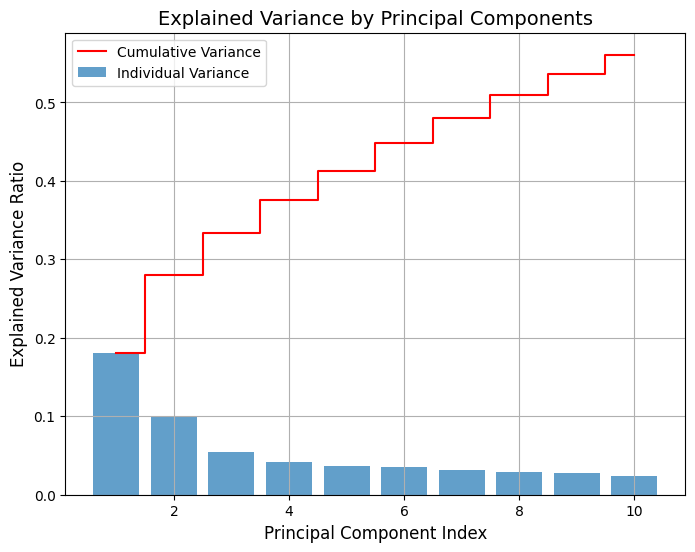

In [26]:
# Plot the variance explained by each component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.legend()
plt.grid()
plt.show()

## Model 1: Logistic Regression

### Building the model using transformed features (results of PCA)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y)


In [28]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

### Model Performance/Evaluation Metrics

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [30]:
# Output results
print("Logistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Logistic Regression Accuracy: 0.9964093357271095

Confusion Matrix:
 [[30120   164]
 [   90 40365]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



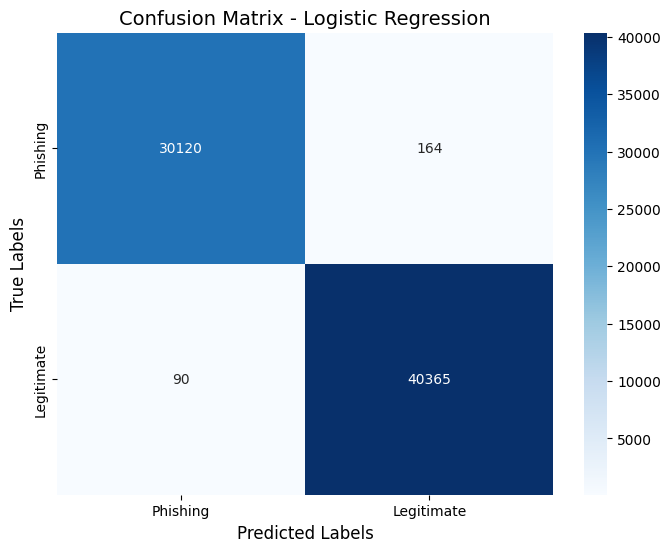

In [31]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.show()

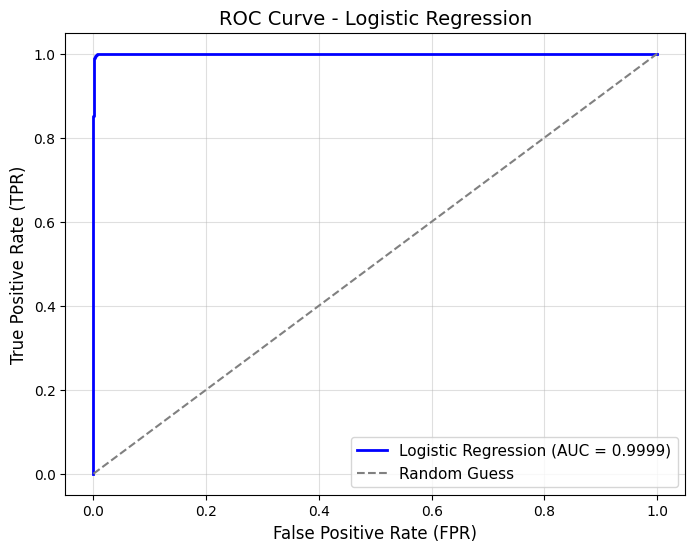

In [32]:
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for label 1

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve - Logistic Regression', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.4)
plt.show()

## Model 2: Naive Bayes


### Building the model using transformed features (results of PCA)


In [34]:
# Initialize and train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

### Model Performance/Evaluation Metrics

In [35]:
# Evaluation Metrics
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9660159176691783
Confusion Matrix (Naive Bayes):
 [[29291   993]
 [ 1411 39044]]
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     30284
           1       0.98      0.97      0.97     40455

    accuracy                           0.97     70739
   macro avg       0.96      0.97      0.97     70739
weighted avg       0.97      0.97      0.97     70739



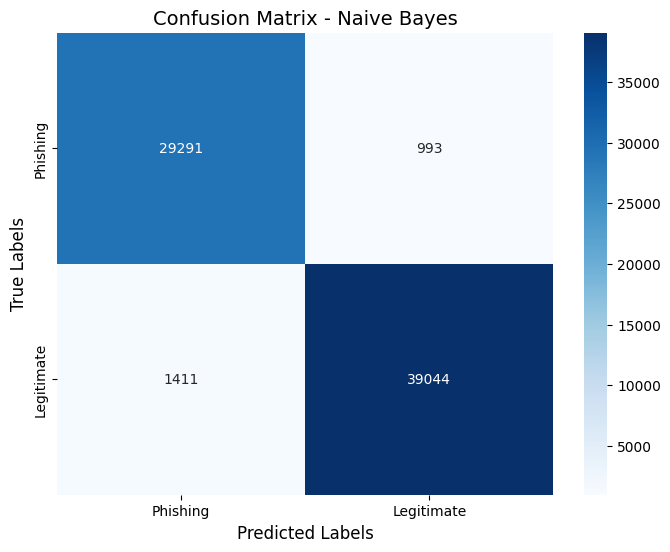

In [36]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - Naive Bayes', fontsize=14)
plt.show()

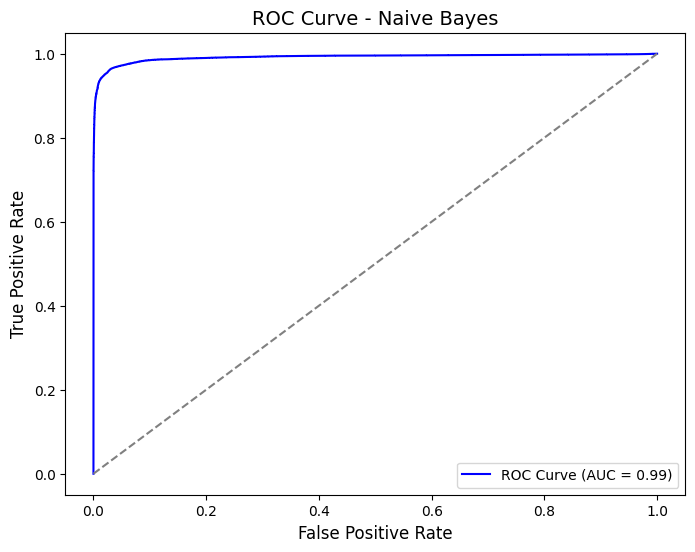

In [37]:
# Compute predicted probabilities
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Naive Bayes', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## Model 3: Random Forest


### Building the model using transformed features (results of PCA)

In [ ]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

### Model Performance/Evaluation Metrics

In [ ]:
# Evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9970172040882681
Confusion Matrix (Random Forest):
 [[30132   152]
 [   59 40396]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



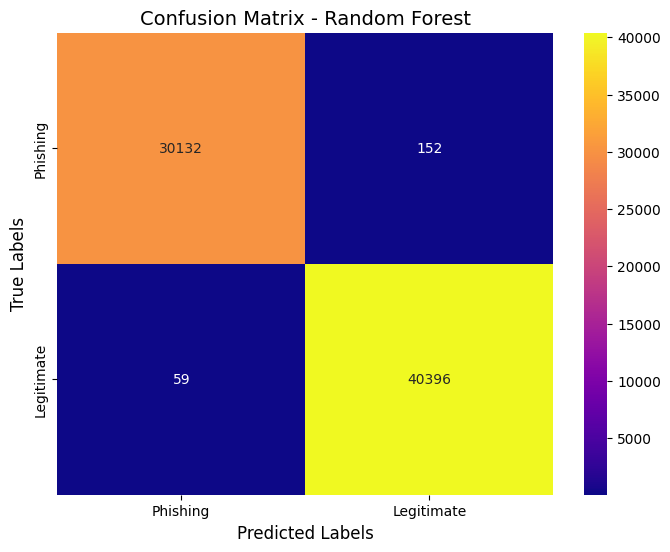

In [ ]:
# Confusion Matrix Heatmap
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - Random Forest', fontsize=14)
plt.show()


## Model 4: Support Vector Machine

### Building the model using transformed features (results of PCA)

In [ ]:
# Initialize and train SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


### Model Performance/Evaluation Metrics

In [ ]:
# Performance Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9967344746179618
Confusion Matrix (SVM):
 [[30123   161]
 [   70 40385]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



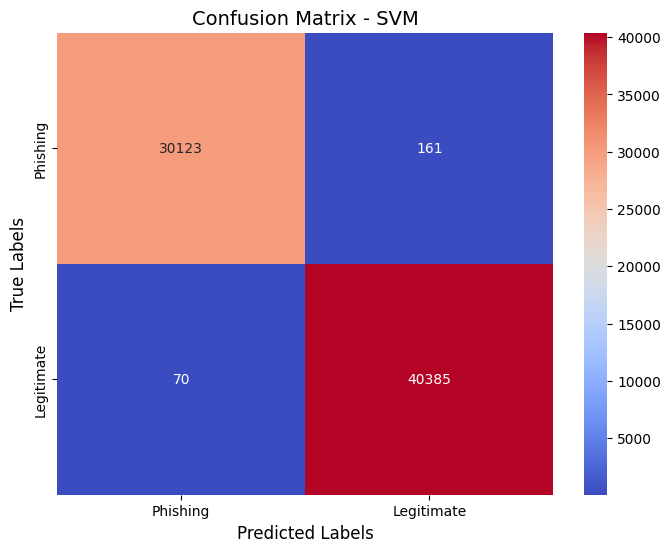

In [ ]:
# Confusion Matrix Heatmap
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - SVM', fontsize=14)
plt.show()


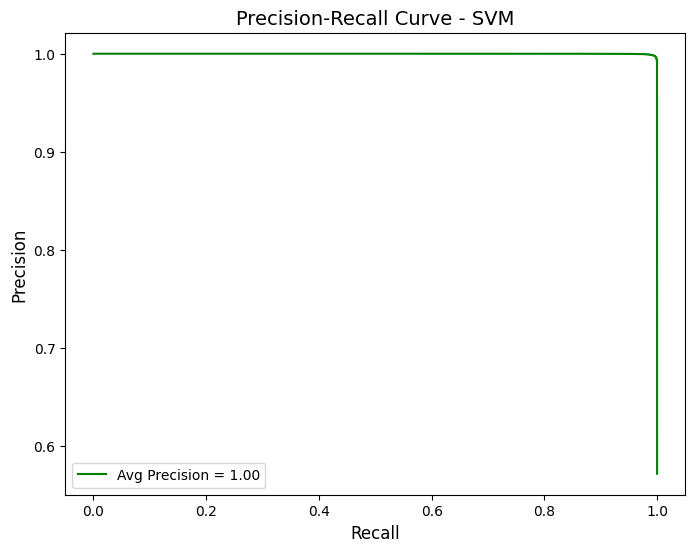

In [ ]:
# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_svm)
average_precision = average_precision_score(y_test, y_prob_svm)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f"Avg Precision = {average_precision:.2f}")
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - SVM', fontsize=14)
plt.legend(loc="lower left")
plt.show()


## Model 5: Decision Tree

### Building the model using transformed features (results of PCA)

In [34]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

### Model Performance/Evaluation Metrics

In [35]:
# Performance Evaluation
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix (DT):\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report (DT):\n", classification_report(y_test, y_pred_dt))

DT Accuracy: 0.9945433212230876
Confusion Matrix (DT):
 [[30076   208]
 [  178 40277]]
Classification Report (DT):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     30284
           1       0.99      1.00      1.00     40455

    accuracy                           0.99     70739
   macro avg       0.99      0.99      0.99     70739
weighted avg       0.99      0.99      0.99     70739



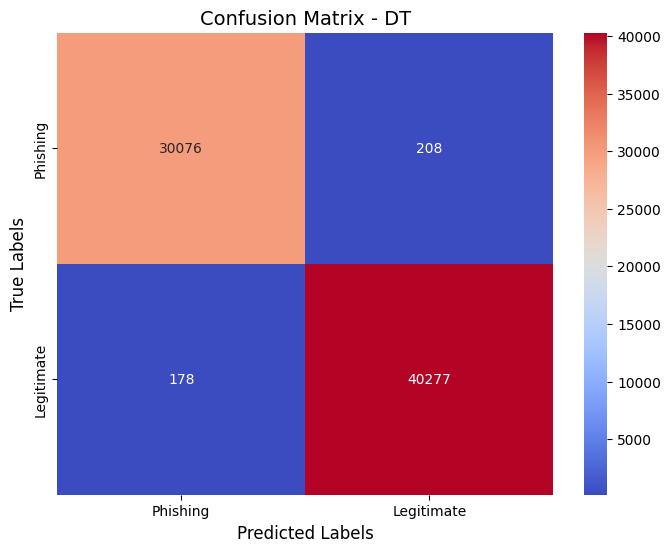

In [36]:
# Confusion Matrix Heatmap
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - DT', fontsize=14)
plt.show()

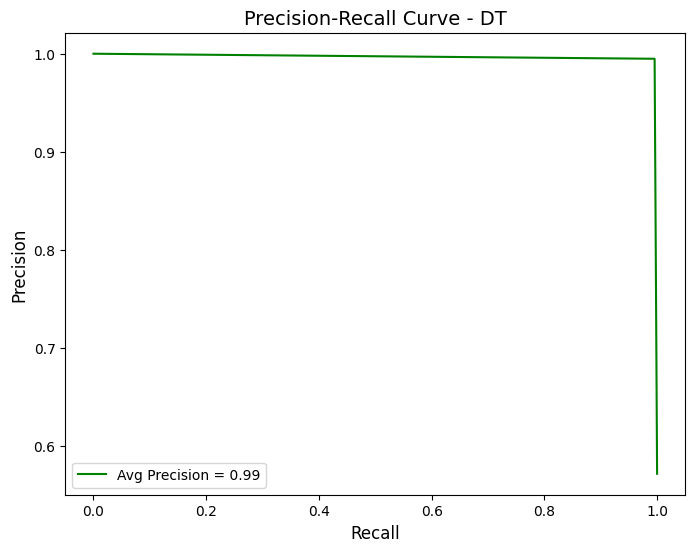

In [39]:
# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_dt)
average_precision = average_precision_score(y_test, y_prob_dt)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f"Avg Precision = {average_precision:.2f}")
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - DT', fontsize=14)
plt.legend(loc="lower left")
plt.show()


## Model 6: XGBoost

### Building the model using transformed features (results of PCA)

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

### Model Performance/Evaluation Metrics

In [42]:
# Performance Evaluation
print("DT Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix (XGB):\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report (XGB):\n", classification_report(y_test, y_pred_xgb))

DT Accuracy: 0.9975826630288808
Confusion Matrix (XGB):
 [[30160   124]
 [   47 40408]]
Classification Report (XGB):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



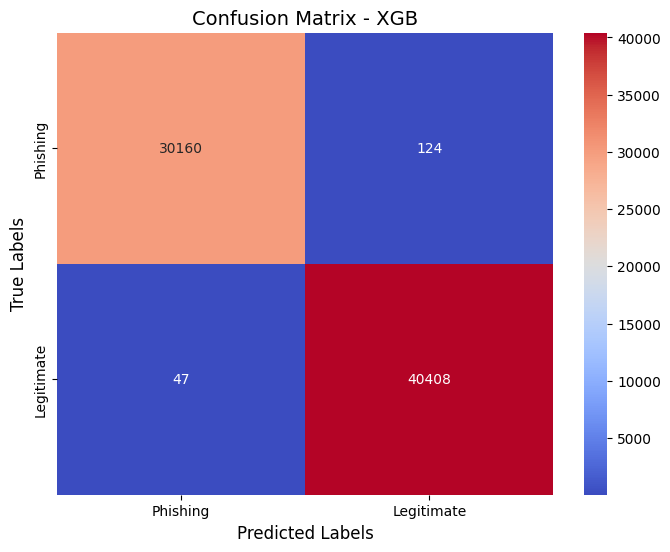

In [43]:
# Confusion Matrix Heatmap
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - XGB', fontsize=14)
plt.show()

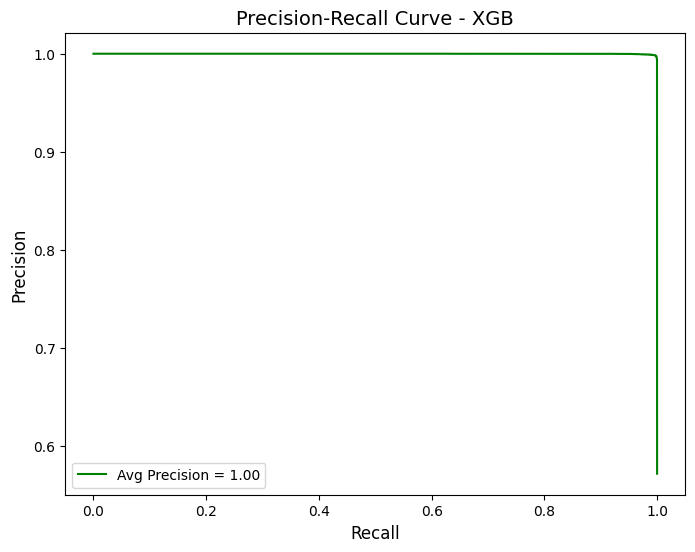

In [44]:
# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_xgb)
average_precision = average_precision_score(y_test, y_prob_xgb)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f"Avg Precision = {average_precision:.2f}")
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - XGB', fontsize=14)
plt.legend(loc="lower left")
plt.show()
